**Engy-5310** Computational Continuum Transport Phenomena, UMass Lowell, Chem. Eng. Nuclear Program Spring 2021; Prof. V. F. de Almeida

# Fluoride Salt Cooled High-Temperature Channel Flow
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\uvar}{\boldsymbol{u}}
  \newcommand{\fvar}{\boldsymbol{f}}
  \newcommand{\normal}{\boldsymbol{n}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Power}{\mathcal{P}}
$

**Student(s):**  Austin Rotker <br>
**Course:** Engy-5310 Computational Continuum Transport Phenomena  <br>
**Mentor:** Prof. Valmor F. de Almeida

UMass Lowell, Dept. of Chemical Engineering, Nuclear Energy Program 
<br>
**27Mar2021**

---
## Table of Contents<a id="toc"></a>
* [Introduction](#intro)
* [Problem Statement](#problem)
* [Objectives](#obj)
* [Approach](#app)
* [Results and Analysis](#ranalysis)
* [Conclusions](#conclusions)
* [References](#refs)
---

## [Introduction](#toc)<a id="intro"></a>

The Fluoride-Cooled High Temperature Reactor (FHR) is a generation IV design which boasts attractive safety features and economic properties; The FLIBE/NAFZIRF coolant proposed for use in FHRs is supplied to the secondary coolant loop at temperatures approaching 700 $^{\circ}$C, far in excess of outflow coolant temperatures seen in water-cooled designs, which results in higher Brayton cycle efficiency and opens the door for use in applications which require very high temperature process heat. Furthermore, cooling during shutdown is accomplished through natural convection, improving safety and reliability as well as lowering capital costs significantly.

The design itself shares similarities with the High Temperature Gas-Cooled Reactor (HTGR). Fuel is present in the form of spherical pellets rather than the cylindrical ones used in more conventional reactors; The reactor itself consists of an anular space within concentric cylinders within which the primary coolant flows and the fuel pellets are introduced. As the fuel pellets are less dense than the surrounding salt, they will slowly be buoyed up to the top of the reactor if they are introduced continuously at the bottom, with a residence time of about two months. Pellets can hence be introduced and removed from the reactor continuously, with no need to shut down for refueling. Primary coolant also flows within this channel around the fuel pebbles, as shown in the following diagram:



Significant amounts of coolant also flow through the central graphite reflector in channels a few centimeters in diameter:

Holes on the sides of the channels allow for cross flow into the reactor for more efficient heat transfer, although this will not be considered in the model which is to follow.




## [Problem Statement](#toc)<a id="problem"></a>

### Domain
Consider FLIBE coolant flowing with a constant velocity $u$ = 2 m/s through the outer coolant flow channels of the graphite reflector, with outer radius $R_o$ = 11.4 cm, inner radius $R_i$ = 10cm, and active length $L$ = 12.0 m. Assume no cross flow from the reactor channel into the reflector outer coolant flow channel, and vice versa. that salt enters the bottom of the reflector flow channels with constant temperature $T_i$ = 600$^{\circ}$C. Assume shutdown mode, and thus flow is driven only by natural convection. Bulk fluid leaves the reactor at 700$^{\circ}$C.

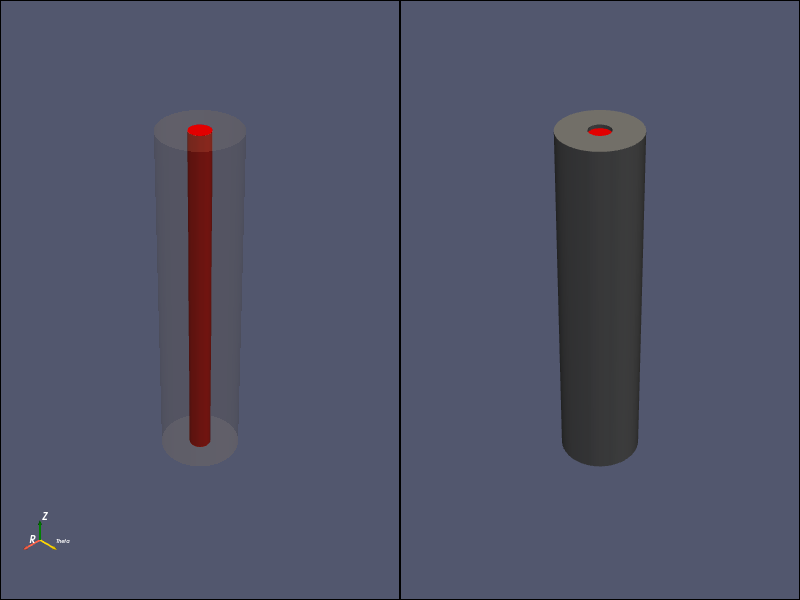

In [3]:
'''Domain'''

def show_domain():
    import pyvista as pv
    pv.set_plot_theme('paraview')

    height = 4.5*(3/4+2*1)
    radius_i = 3/4 / 2
    radius_o = radius_i + 1
    coolant = pv.Cylinder(center=(0,0,0), direction=(0,0,1), height=height, radius=radius_i)
    pin = pv.Cylinder(center=(0,0,0), direction=(0,0,1), height=height, radius=radius_o)

    plo = pv.Plotter(notebook=True,shape=(1,2)) 

    plo.subplot(0,0)
    plo.add_mesh(coolant, color='red', opacity=1.0,)
    plo.add_mesh(pin, color='tan', opacity=0.99)
    plo.add_axes(xlabel='R', ylabel='Theta', zlabel='Z')

    pin = pin.triangulate()
    tmp = pv.Cylinder(center=(0,0,0), direction=(0,0,1), height=height*1.1, radius=radius_i).triangulate()
    tmp.flip_normals()

    pin = pin.boolean_cut(tmp)
    plo.subplot(0,1)
    plo.add_mesh(pin, 'grey')
    plo.add_mesh(pv.Cylinder(center=(0,0,0), direction=(0,0,1), height=height*.98, radius=radius_i), 'red')
    cpos = plo.show(window_size=[800, 600])

|  |
|:---:|
| <img width="380" src="pictures/ProblemStatement.png" title="sketch"> |
| <p style="text-align:center;"><b>Domain sketch.</b></p> |

### [Strong Form Heat Conduction in the Solid Phase](#toc)<a id="strong"></a>
The strong form of the governing equation for heat conduction in the graphite on either side of the coolant channel reads

\begin{align*}
\rho c_p\,\partial_t T &= k \nabla^2 T + S = k \Bigl(\partial^2_{r^2} T + \partial^2_{z^2} T\Bigr).
\end{align*}

With the following boundary conditions:

\begin{align*}
T(r, 0) &= T_0 \quad &\text{(A)} \\
\partial_z T(r, L) &= 0 \quad &\text{(B)} \\
 \nabla T - h\,\bigl(T(R_\text{i}, z) - T_\text{b,i}(z)\bigr) &= 0 \quad &\text{(C)} \\
 -\nabla T + h\,(T(R_\text{o}, z) - T_\text{b,o}(z)) &= 0 \quad  &\text{(D)} \\
\end{align*}

where: 
A: is the given temperature at the bottom of the reflector (Dirichlet);

B: is the heat flux across the top boundary of the reflector (Neumann);

C: all heat conducted to the inner boundary is transferred to the coolant flowing through the coolant flow channels within the graphite reflector (Robin);

and D: all heat conducted away from the outer boundary is transferred to the system by the coolantg flowing outside the reflector (Robin).

### [Weak (Variational) Form of the Heat Conduction in the Solid Phase](#toc)<a id="strong"></a>
The associated steady-state, Galerkin weak form is

\begin{align*}
0 &= \int_\Omega -k\, \nabla T \cdot \nabla u \, dV + \int_{\partial\Omega} k\,\partial_\normal T \, u \, dS
\end{align*}

### [Strong Form Fluid Flow and Heat Transport in the Salt](#toc)<a id="strong"></a>
We begin with the strong form for heat conduction through the graphite on either side of the coolant channel.

\begin{align*}
\rho c_p \frac{dT}{dt} &= -k \nabla^2 T = -k \Bigl(\frac{d^2}{dr^2} + \frac{d^2}{dz^2}\Bigr)
\end{align*}

With the following boundary conditions:

\begin{align*}
T(r, 0) &= T_0 \quad &\text{(A)} \\
\frac{dT}{dz}(r, Z) &= 0 \quad &\text{(B)} \\
k\, \nabla T(R_\text{i}, z) - h\,\bigl(T(R_\text{i}, z) - T_\text{b,i}(z)\bigr) &= 0 \quad &\text{(C)} \\
-k\, \nabla T(R_\text{o}, z) + h(T(R_\text{o}, z) - T_\text{b,o}(z)) &= 0 \quad  &\text{(D)} \\
\end{align*}

A: Given temperature at the bottom of the reflector (Dirichlet).

B: Zero heat flux across the top boundary of the reflector (Neumann). 

C: All heat conducted to the inner boundary is transferred to the coolant flowing through the coolant flow channels within the graphite reflector (Robin).

D: All heat conducted away from the outer boundary is transferred to the system by the coolantg flowing outside the reflector (Robin).

The equations describing the flow of fluid within the conduit are as follows:

\begin{align*}
\rho c_p (\frac{dT}{dt} + v \cdot \nabla T) &= -k \nabla^2 T \\
\rho \nabla \cdot (v \otimes v) &= \nabla \cdot (-p - \mu(\nabla v \cdot \nabla v^T) + \rho_0 + \beta(T - T_{ref}) \\
\nabla \cdot v &= 0
\end{align*}

With the following boundary conditions on temperature:
\begin{align*}
T(r, 0) &= T_0 \; (A)\\
- k \nabla T(R, z) + h(T(R, z) - T_w(z)) &= 0 \; (B)\\
\frac{dT}{dz}(r, Z) &= 0 \; (C)
\end{align*}

A: Given temperature at the bottom of the reflector (from coolant inflow temperature). (Dirichlett)

B: All heat transferred into the fluid from the wall is carried out by conduction and convection. (Robin)

C: No heat flux across the outflow boundary. (Neumann)

And the following boundary conditions on pressure:

\begin{align*}
p(r, 0) &= P_0 \; (A)\\
\frac{dp(r, Z)}{dz} &= - \tau \vec{n} \; (B)\\
\frac{dp(R, z)}{dx} &= 0 \; (C) 
\end{align*}

A: Given pressure at the bottom of the reflector(from pumping and system pressure). (Dirichlett)

B: No temperature change at the outflow surface and hence no change in buoyancy. Thus the traction vector sums to zero and the rate of change of pressure is simply equal to the sum of the viscous forces acting along the normal boundary vector (in this case, the Z-direction).

C: The pressure gradient across the bounadry is equal to zero (no pressure flux through the walls of the channel).

Note that, in all cases, the velocity $v$ is specified at all points within the liquid phase, and therefore its divergence and gradient are specified as well. Additionally, as we assume steady flow, $\frac{dv}{dz} = 0$.




### [Weak (Variational) Forms of All Relevant Equations](#toc)<a id="strong"></a>
Taking $u$ as our  test function, we may arrive at the variational forms.

For the heat balance in the solid phase:
\begin{align*}
0 &= \int_\Omega -k \nabla T \cdot \nabla u + \int_{d \Omega} \frac{dT}{d \vec{n}} u \ dS
\end{align*}

For the heat balance in the liquid phase:
\begin{align*}
\int_\Omega \rho c_p v \cdot \nabla T u &= \int_\Omega -k \nabla T \cdot \nabla u + \int_{d \Omega} \frac{dT}{d \vec{n}} u \ dS
\end{align*}

For the momentum balance in the liquid phase:
\begin{align*}
\int_\Omega \rho \nabla \cdot (v \otimes v) u &= \int_\Omega -p \nabla u + \int_{d \Omega} \frac{dp}{d \vec{n}} u \ dS - \int_\Omega \nabla \cdot \mu (\nabla v \cdot \nabla v^T) u + \int_\Omega (\rho_0 + \beta T_{ref})u + \int_\Omega T u
\end{align*}


## [Objectives](#toc)<a id="obj"></a>

- Determine the maximum temperature and pressure within the reflector flow channels
- Determine the decay heat power absorbed by the system at steady state
- Analyze heat flux across the surface of the pipe

## [Current Progress](#toc)<a id="ranalysis"></a>

Completed:

$\bullet$ Kernels for each phase

$\bullet$ Dirichlett, Neumann BC's


Remaining work:

$\bullet$ Custom BC coupling along the solid/liquid boundary

$\bullet$ Custom Robin BC w/ outside fluid temperature as a function of distance

$\bullet$ implement the proper velocity functionals to model viscous flow

$\bullet$ Bugfixes



## [Conclusions](#toc)<a id="conclusions"></a>

## [References](#toc)<a id="refs"></a>

- [1] V. F. de Almeida, [*Engy-5310: Computational Continuum Transport Phenomena*](https://github.com/dpploy/engy-5310), University of Massachusetts Lowell, Dept. of Chemical Engineering (Nuclear Energy Program).
- [2] Multiphysics Object-Oriented Simulation Environment [(MOOSE)](https://mooseframework.org)
- [3] Andreades, Charalampos et. al, [*Technical Description of the “Mark 1” Pebble-Bed Fluoride-Salt-Cooled High-Temperature Reactor (PB-FHR) Power Plant*](https://web.mit.edu/nse/pdf/researchstaff/forsberg/FHR%20Point%20Design%2014-002%20UCB.pdf), University of California Berkely, Dept. of Nuclear Engineering. 2014. 
- [4] author, [reference]()